## 과제2
- 글씨가 포함된 이미지에서 노이즈를 제거하는 과정
- 이미지의 크기는 540 x 540 으로 모두 조정
- 렘 또는 메모리 부족으로 진행이 불가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# 모델 도식화 가능
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import Sequential
from keras.utils import plot_model
from keras.utils import set_random_seed

In [2]:
import os
sl = ['./Noisy_Documents/noisy/'+i for i in os.listdir('./Noisy_Documents/noisy/')]
sl2 = ['./Noisy_Documents/noisy/'+i for i in os.listdir('./Noisy_Documents/clean/')]

In [3]:
from PIL import Image
train = np.concatenate((np.array(Image.open(sl[0]).resize((420,420))).reshape(1,420,420,3), np.array(Image.open(sl[1]).resize((420,420))).reshape(-1,420,420,3)))
for i in range(2, len(sl)):
    train = np.concatenate((train, np.array(Image.open(sl[i]).resize((420,420))).reshape(-1,420,420,3)))
train.shape

(216, 420, 420, 3)

In [4]:
test = np.concatenate((np.array(Image.open(sl[0]).resize((420,420))).reshape(1,420,420,3), np.array(Image.open(sl[1]).resize((420,420))).reshape(-1,420,420,3)))
for i in range(2, len(sl2)):
    test = np.concatenate((test, np.array(Image.open(sl[i]).resize((420,420))).reshape(-1,420,420,3)))
test.shape

(216, 420, 420, 3)

In [5]:
train = train/255.0
test = test/255.0

In [6]:
train_flatten = train.reshape(train.shape[0], -1)
test_flatten = test.reshape(test.shape[0], -1)

In [7]:
print(train_flatten.shape, test_flatten.shape)

(216, 529200) (216, 529200)


In [8]:
def createAuto(node):
    md = Sequential()
    md.add(Dense(units=node, activation='relu', input_shape=(529200,)))
    md.add(Dense(529200, activation='sigmoid'))
    md.compile(loss='mean_squared_error', optimizer='adam' )
    return md

In [9]:
md = createAuto(5000)
md.fit(train_flatten, train_flatten)

In [ ]:
pre_out = md.predict(train_flatten)

7/7 [==============================] - 2s 195ms/step


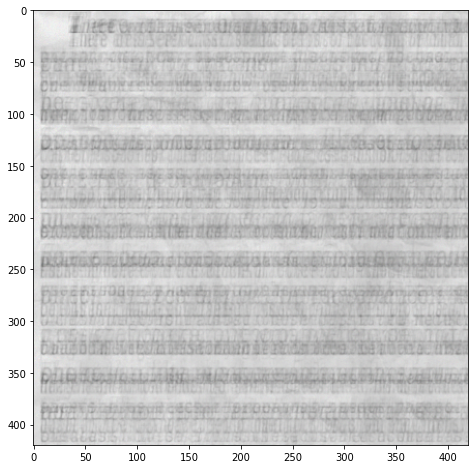

In [ ]:
plt.imshow(pre_out[0].reshape(420,420,3), cmap='gray')
plt.show()

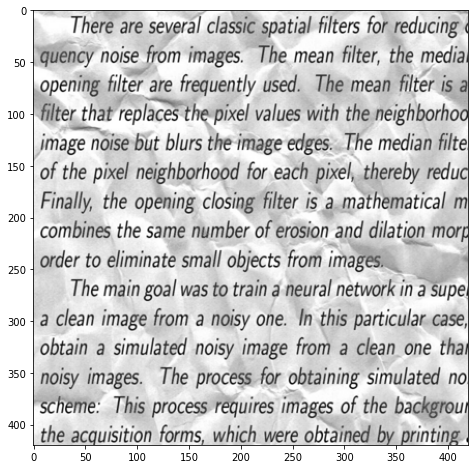

In [ ]:
plt.imshow(train_flatten[0].reshape(420,420,3), cmap='gray')
plt.show()

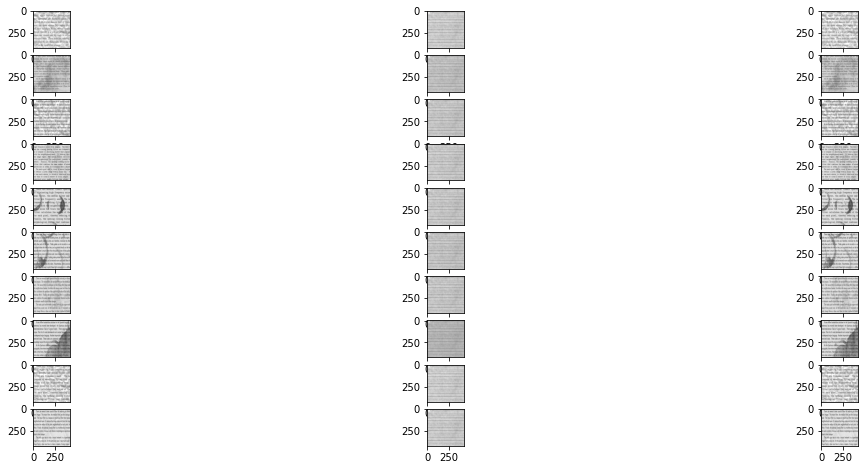

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
fig, axs = plt.subplots(10,3)
for i in range(1,10*3+1):
    if i % 3 == 1:
        plt.subplot(10,3,i)
        plt.imshow(train_flatten[1+((i-1)//3)].reshape(420,420,3), cmap='gray')
    elif i % 3 == 2:
        plt.subplot(10,3,i)
        plt.imshow(pre_out[1+((i-1)//3)].reshape(420,420,3), cmap='gray')
    elif i % 3 == 0:
        plt.subplot(10,3,i)
        plt.imshow(test_flatten[1+((i-1)//3)].reshape(420,420,3), cmap='gray')
plt.show()